In [ ]:
#### Assignment Ensemble Techniques Pratical Questions ####

Q21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [9]:
import sklearn
print(sklearn.__version__)

1.5.1


In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


Q22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [14]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 994.1027861104376


Q23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_

for feature, importance in zip(data.feature_names, importances):
    print(f"{feature}: {importance:.4f}")

mean radius: 0.0348
mean texture: 0.0152
mean perimeter: 0.0680
mean area: 0.0605
mean smoothness: 0.0080
mean compactness: 0.0116
mean concavity: 0.0669
mean concave points: 0.1070
mean symmetry: 0.0034
mean fractal dimension: 0.0026
radius error: 0.0143
texture error: 0.0037
perimeter error: 0.0101
area error: 0.0296
smoothness error: 0.0047
compactness error: 0.0056
concavity error: 0.0058
concave points error: 0.0038
symmetry error: 0.0035
fractal dimension error: 0.0059
worst radius: 0.0828
worst texture: 0.0175
worst perimeter: 0.0808
worst area: 0.1394
worst smoothness: 0.0122
worst compactness: 0.0199
worst concavity: 0.0373
worst concave points: 0.1322
worst symmetry: 0.0082
worst fractal dimension: 0.0045


Q24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
forest = RandomForestRegressor(n_estimators=10, random_state=42)

tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

y_tree = tree.predict(X_test)
y_forest = forest.predict(X_test)

print("MSE - Decision Tree:", mean_squared_error(y_test, y_tree))
print("MSE - Random Forest:", mean_squared_error(y_test, y_forest))

MSE - Decision Tree: 2010.3086284190963
MSE - Random Forest: 908.6652649932128


Q25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=5, random_state=42)

model = RandomForestClassifier(n_estimators=15, oob_score=True, random_state=42)
model.fit(X, y)
print("OOB Score:", model.oob_score_)

OOB Score: 0.87


Q26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


Q27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for n in [10, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"n_estimators={n}, Accuracy={accuracy_score(y_test, y_pred):.4f}")


n_estimators=10, Accuracy=1.0000
n_estimators=50, Accuracy=1.0000
n_estimators=100, Accuracy=1.0000
n_estimators=200, Accuracy=1.0000


Q28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = make_classification(n_samples=200, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]

print("AUC Score:", roc_auc_score(y_test, y_prob))


AUC Score: 0.8472850678733032


Q29. Train a Random Forest Regressor and analyze feature importance scores.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=200, n_features=5, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Feature Importances:", model.feature_importances_)


Feature Importances: [0.01283374 0.01790727 0.41588562 0.02167459 0.53169878]


Q30. Train an ensemble model using both Bagging and Random Forest and compare 

In [22]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

bag_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

bag_acc = accuracy_score(y_test, bag_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

print("Bagging Accuracy:", bag_acc)
print("Random Forest Accuracy:", rf_acc)


Bagging Accuracy: 1.0
Random Forest Accuracy: 1.0


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Data
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model + GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Evaluate
best = grid.best_estimator_
y_pred = best.predict(X_test)
print("Best params:", grid.best_params_)
print(classification_report(y_test, y_pred))


Best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        66
           1       0.90      0.86      0.88        84

    accuracy                           0.87       150
   macro avg       0.86      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

In [39]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Data
X, y = make_regression(n_samples=500, n_features=10, noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Compare n_estimators
for n in [5, 10, 20, 50]:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=0
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # use the new function for RMSE
    rmse = root_mean_squared_error(y_test, preds)
    print(f"n_estimators={n} → RMSE={rmse:.3f}")


n_estimators=5 → RMSE=79.054
n_estimators=10 → RMSE=70.407
n_estimators=20 → RMSE=65.907
n_estimators=50 → RMSE=66.867


In [ ]:
### Q33. Train a Random Forest Classifier and analyze misclassified samples.


In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# 3) Predict and compute confusion matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# 4) Find misclassified indices
mis_idx = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
print(f"\nNumber of misclassified samples: {len(mis_idx)}")

# 5) Prepare a list of first 5 misclassifications for display
mis_examples = [
    {"index": i, "true": y_test[i], "pred": y_pred[i], "features": X_test[i].tolist()}
    for i in mis_idx[:5]
]

# Return for Jupyter display
mis_examples


Confusion matrix:
 [[58  8]
 [13 71]]

Number of misclassified samples: 21


[{'index': 1,
  'true': 0,
  'pred': 1,
  'features': [1.3559342576239626,
   -1.172726913036587,
   -0.07655212712475945,
   -0.08732818705761503,
   -3.152021098231856,
   -2.3589724067668336,
   -0.9249856993465512,
   1.9783726998796622,
   -0.6293390742828846,
   0.028169873189996596]},
 {'index': 5,
  'true': 1,
  'pred': 0,
  'features': [1.0470655724363682,
   -0.5579045064649167,
   -1.9470624098274723,
   -0.9818996930473791,
   -1.2657908253763992,
   -1.2670914516797844,
   -0.6058039688734297,
   -0.849614021965846,
   -0.33799015548375855,
   -0.9538609617541668]},
 {'index': 9,
  'true': 0,
  'pred': 1,
  'features': [1.4404503585786905,
   -1.54677273499123,
   1.5520014246320764,
   -1.7126293226824552,
   -4.7111763685433425,
   -2.30420384844052,
   -1.7197510943738228,
   -0.47622443631466943,
   -1.6002299592979714,
   0.5917269751515682]},
 {'index': 17,
  'true': 0,
  'pred': 1,
  'features': [1.3028396654746377,
   -2.054535589429749,
   -0.30728040979356386,
  

In [ ]:
### Q34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train a single Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))
print(f"Decision Tree accuracy: {dt_acc:.3f}")

# 3) Train a Bagging Classifier with Decision Trees as base estimators
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=0
)
bg.fit(X_train, y_train)
bg_acc = accuracy_score(y_test, bg.predict(X_test))
print(f"Bagging Classifier accuracy: {bg_acc:.3f}")

# 4) Return results for Jupyter display
results = {
    "Decision Tree Accuracy": dt_acc,
    "Bagging Classifier Accuracy": bg_acc
}
results


Decision Tree accuracy: 0.793
Bagging Classifier accuracy: 0.860


{'Decision Tree Accuracy': 0.7933333333333333,
 'Bagging Classifier Accuracy': 0.86}

In [ ]:
### Q35. Train a Random Forest Classifier and visualize the confusion matrix.


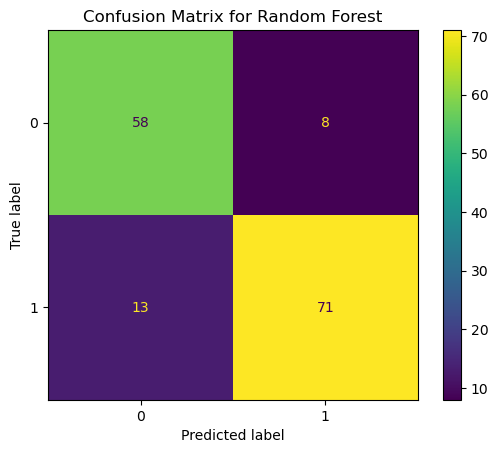

In [49]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# 3) Predict and display confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix for Random Forest")
plt.show()


In [ ]:
### Q36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.


In [52]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Define base learners and stacking model
estimators = [
    ('dt', DecisionTreeClassifier(random_state=0)),
    ('svc', SVC(probability=True, random_state=0))
]
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# 3) Train and evaluate
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
stack_acc = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier accuracy: {stack_acc:.3f}")


Stacking Classifier accuracy: 0.893


In [ ]:
### Q37. Train a Random Forest Classifier and print the top 5 most important features.

In [53]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# 3) Compute feature importances and sort
importances = rf.feature_importances_
indices = importances.argsort()[::-1][:5]

# 4) Print the top 5 features
print("Top 5 feature importances (feature index: importance):")
for idx in indices:
    print(f"Feature {idx}: {importances[idx]:.4f}")

# 5) Return list of tuples for Jupyter display
top5 = [(int(idx), float(importances[idx])) for idx in indices]
top5


Top 5 feature importances (feature index: importance):
Feature 6: 0.2711
Feature 8: 0.1890
Feature 5: 0.1422
Feature 4: 0.0923
Feature 0: 0.0871


[(6, 0.2711351872057966),
 (8, 0.18904393732558578),
 (5, 0.1422473820008795),
 (4, 0.09226990649946744),
 (0, 0.08706158837978581)]

In [ ]:
### Q38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.


In [54]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_recall_fscore_support

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train a Bagging Classifier
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0),
    n_estimators=20,
    random_state=0,
    n_jobs=-1
)
bg.fit(X_train, y_train)

# 3) Predict and evaluate
y_pred = bg.predict(X_test)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary'
)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

# 4) Return the metrics for display
{"precision": precision, "recall": recall, "f1_score": f1}


Precision: 0.899
Recall:    0.845
F1-score:  0.871


{'precision': 0.8987341772151899,
 'recall': 0.8452380952380952,
 'f1_score': 0.8711656441717791}

In [ ]:
### Q39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.


In [55]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train Random Forests with different max_depth values and record accuracy
results = []
for depth in [None, 5, 10, 20]:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        random_state=0
    )
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    print(f"max_depth={depth!s:<4} → Accuracy={acc:.3f}")
    results.append((depth, acc))

# 3) Return results for Jupyter display
results


max_depth=None → Accuracy=0.860
max_depth=5    → Accuracy=0.867
max_depth=10   → Accuracy=0.860
max_depth=20   → Accuracy=0.860


[(None, 0.86), (5, 0.8666666666666667), (10, 0.86), (20, 0.86)]

In [ ]:
### Q40. Train a Bagging Regressor using different base estimators (DecisionTreeRegressor and KNeighborsRegressor) and compare performance.

In [56]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

# 1) Generate a regression dataset
X, y = make_regression(
    n_samples=500,
    n_features=10,
    noise=0.2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train BaggingRegressor with different base estimators
results = []
for base in [DecisionTreeRegressor(random_state=0), KNeighborsRegressor()]:
    model = BaggingRegressor(
        estimator=base,
        n_estimators=20,
        random_state=0,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    print(f"{base.__class__.__name__} base → RMSE={rmse:.3f}")
    results.append((base.__class__.__name__, rmse))

# 3) Return results for Jupyter display
results


DecisionTreeRegressor base → RMSE=65.907
KNeighborsRegressor base → RMSE=69.957


[('DecisionTreeRegressor', 65.90706514149535),
 ('KNeighborsRegressor', 69.95711502849221)]

In [ ]:
### Q41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [57]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# 3) Compute predicted probabilities and ROC-AUC
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# 4) Return for Jupyter display
roc_auc


ROC-AUC Score: 0.917


0.9167568542568544

In [ ]:
### Q42. Train a Bagging Classifier and evaluate its performance using cross-validation.

In [58]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)

# 2) Define the Bagging Classifier
bg = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0),
    n_estimators=20,
    random_state=0,
    n_jobs=-1
)

# 3) Evaluate with 5-fold cross-validation
scores = cross_val_score(bg, X, y, cv=5)

# 4) Print and return results
print("Cross-validation accuracies:", scores)
print("Mean accuracy:", scores.mean())

# Return scores for Jupyter display
scores


Cross-validation accuracies: [0.82 0.91 0.89 0.87 0.88]
Mean accuracy: 0.874


array([0.82, 0.91, 0.89, 0.87, 0.88])

In [ ]:
### Q43. Train a Random Forest Classifier and plot the Precision–Recall curve.

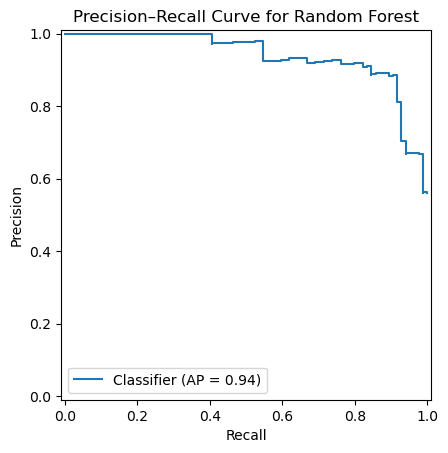

In [59]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# 3) Predict probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:, 1]

# 4) Plot Precision–Recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.title("Precision–Recall Curve for Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
### Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [60]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1) Generate a binary classification dataset
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_classes=2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Define the stacking ensemble (RF as base, LR as final estimator)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=0))
]
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# 3) Train and evaluate
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
stack_acc = accuracy_score(y_test, y_pred)
print(f"Stacking (RF + LR) accuracy: {stack_acc:.3f}")

# 4) Return accuracy for Jupyter display
stack_acc

Stacking (RF + LR) accuracy: 0.860


0.86

In [ ]:
### Q45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [61]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

# 1) Generate a regression dataset
X, y = make_regression(
    n_samples=500,
    n_features=10,
    noise=0.2,
    random_state=0
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 2) Train BaggingRegressor with and without bootstrap sampling
results = []
for boot in [True, False]:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=0),
        n_estimators=20,
        bootstrap=boot,
        random_state=0,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    print(f"bootstrap={boot} → RMSE={rmse:.3f}")
    results.append((boot, rmse))

# 3) Return results for Jupyter display
results

bootstrap=True → RMSE=65.907
bootstrap=False → RMSE=105.717


[(True, 65.90706514149535), (False, 105.71677402349597)]